<a href="https://colab.research.google.com/github/huppybirthday/Prog2kakushin/blob/main/work3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

画像にturtleで文字やマークなどを描くプログラム

In [12]:

import numpy as np
import sys
import cv2
from google.colab.patches import cv2_imshow


In [14]:
!wget "https://drive.google.com/uc?export=download&id=1hsUauww6HMD9YMejBh72as9x9wNCWeBc" -O images.zip
!unzip -o images.zip

--2023-01-12 06:14:05--  https://drive.google.com/uc?export=download&id=1hsUauww6HMD9YMejBh72as9x9wNCWeBc
Resolving drive.google.com (drive.google.com)... 172.217.204.138, 172.217.204.102, 172.217.204.139, ...
Connecting to drive.google.com (drive.google.com)|172.217.204.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-0o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ll5hhtljre5v0bulqnvogm2td2b4j41p/1673504025000/05465361039627264646/*/1hsUauww6HMD9YMejBh72as9x9wNCWeBc?e=download&uuid=5423e722-f428-46ca-9de0-a616633de8b6 [following]
--2023-01-12 06:14:06--  https://doc-04-0o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ll5hhtljre5v0bulqnvogm2td2b4j41p/1673504025000/05465361039627264646/*/1hsUauww6HMD9YMejBh72as9x9wNCWeBc?e=download&uuid=5423e722-f428-46ca-9de0-a616633de8b6
Resolving doc-04-0o-docs.googleusercontent.com (doc-04-0o-docs.googleusercontent.com)... 74.125.28.132, 26

In [77]:
# 画像ファイルを読み込み，画像オブジェクトを作成して，変数 img に代入
img = cv2.imread('canal.jpg')

# エラー処理: 画像ファイルの読み込みが失敗の場合は，プログラム終了
if img is None:
  sys.exit('エラー: ファイルを開けませんでした')


In [102]:
dif = 3

In [103]:
tate = img.shape[0] 
yoko = img.shape[1] 

if tate % dif != 0:
  tate = int(tate/dif)*dif
if yoko % dif != 0:
  yoko = int(yoko/dif)*dif

img = img[0:tate,0:yoko]
print(tate,yoko)

210 318


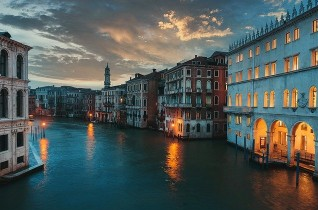

In [104]:
# Colab環境で img の画像を画面に表示
cv2_imshow(img)

In [105]:
za_li = []
for i in range(dif):
  y = i*(tate/dif)
  for i2 in range(dif):
    x = i2 * (yoko/dif)
    za_li.append([int(y),int(x)])

print(za_li)

[[0, 0], [0, 106], [0, 212], [70, 0], [70, 106], [70, 212], [140, 0], [140, 106], [140, 212]]


In [106]:
num_li = []
for i in range(dif**2):
  num_li.append(i)

In [107]:
for i in num_li:
  exec("im{} = img[za_li[i][0]: za_li[i][0] + int(tate/dif) , za_li[i][1]: za_li[i][1] + int(yoko/dif)]".format(i))

In [108]:
im_li = []
for i in range(len(num_li)):
  exec("im_li.append(im{})".format(i))

In [109]:
import random
im_ran = random.sample(im_li,len(im_li))

In [110]:
last_im = im_ran[-1]

In [111]:
bla = np.zeros((tate,yoko,3), np.uint8)
bla_za = za_li[-1]

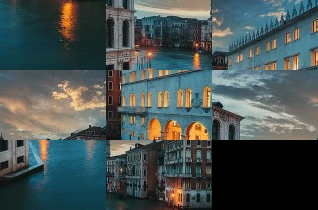

In [112]:
for i in range(dif**2-1):
  #cv2.imshow(im_li[i])
  bla[za_li[i][0]: za_li[i][0] + int(tate/dif), za_li[i][1]: za_li[i][1] + int(yoko/dif)] = im_ran[i]
cv2_imshow(bla)

In [120]:
bla_basho = dif**2
count = 0
while im_ran != im_li:
  n = int(input("動かしたい画像の座標を入力:"))
  if n == bla_basho+1 or n == bla_basho-1 or n == bla_basho+dif or n == bla_basho-dif:
    im_ran[bla_basho-1] = im_ran[n-1]
    im_ran[n-1] = last_im
    bla[za_li[bla_basho-1][0]:za_li[bla_basho-1][0] + int(tate/dif) , za_li[bla_basho-1][1]:za_li[bla_basho-1][1] + int(yoko/dif) ] = im_ran[bla_basho-1]

    bla_basho = n
    bla[za_li[bla_basho-1][0]:za_li[bla_basho-1][0] + int(tate/dif) , za_li[bla_basho-1][1]:za_li[bla_basho-1][1] + int(yoko/dif) ] = np.zeros(int(tate/dif),int(yoko/dif),3, np.uint8)
    
    cv2_imshow(bla)

ValueError: ignored